In [7]:
from sklearn.kernel_approximation import RBFSampler
from sklearn.tree import DecisionTreeRegressor, plot_tree, export_text
import random

from utils.data_loaders import get_wake_datasets
from utils.evaluation import test_sklearn_model
import utils.plotting as plotting

In [27]:
FACTORS_FOLDER = "discr_factors_x2_30_y-2_2_step0.125_TIstep0.01_CTstep0.01"
DATA_FOLDER = f"data/{FACTORS_FOLDER}/"
CONSIDER_WS = True
COORDS_AS_INPUT = True # univariate setting
MAX_DEPTH = 20

#FOURIER_COMPONENTS = 2

MODEL_NAME = f"univariate_DT_max-depth{MAX_DEPTH}"
if CONSIDER_WS:
    MODEL_NAME += "_consider_ws"
print(MODEL_NAME)

univariate_DT_max-depth20_consider_ws


In [21]:
train_dataset, valid_dataset, test_dataset = get_wake_datasets(DATA_FOLDER,
                                                               consider_ws=CONSIDER_WS,
                                                               coords_as_input=COORDS_AS_INPUT,
                                                               train_perc=0.6,
                                                               validation_perc=0.2,
                                                               test_perc=0.2)

train_x, train_y = train_dataset.inputs, train_dataset.outputs
print("Train shapes: ", train_x.shape, train_y.shape)

"""
if valid_dataset is not None:
    valid_x, valid_y = valid_dataset.inputs, valid_dataset.outputs
    print("Valid shapes: ", valid_x.shape, valid_y.shape)
"""
del valid_dataset

grid_size = train_dataset.num_cells
print(f"{grid_size=}")

Train shapes:  torch.Size([59136000, 5]) torch.Size([59136000, 1])
grid_size=7168


# Training

In [28]:
model = DecisionTreeRegressor(max_depth=MAX_DEPTH)
model.fit(train_x, train_y)

DecisionTreeRegressor(max_depth=20)

In [ ]:
tree_text = export_text(model)
print(tree_text)

In [24]:
test_x, test_y = test_dataset.inputs, test_dataset.outputs
print("Test shapes: ", test_x.shape, test_y.shape)

Test shapes:  torch.Size([15769600, 5]) torch.Size([15769600, 1])


In [30]:
test_sklearn_model(model, test_x, test_y,
                   model_description=MODEL_NAME+"_"+FACTORS_FOLDER,
                   save_results=True)

Test results for univariate_DT_max-depth20_consider_ws_discr_factors_x2_30_y-2_2_step0.125_TIstep0.01_CTstep0.01
r2_score=0.9990455502113665
explained_variance_score=0.9990455528854975
mean_squared_error=1.1866984669039594e-06
mean_absolute_error=0.0002793622685099815
median_absolute_error=3.7746503949165344e-05
mean_absolute_percentage_error=0.03755346267798031
Prediction time=8.886814564950281e-08s


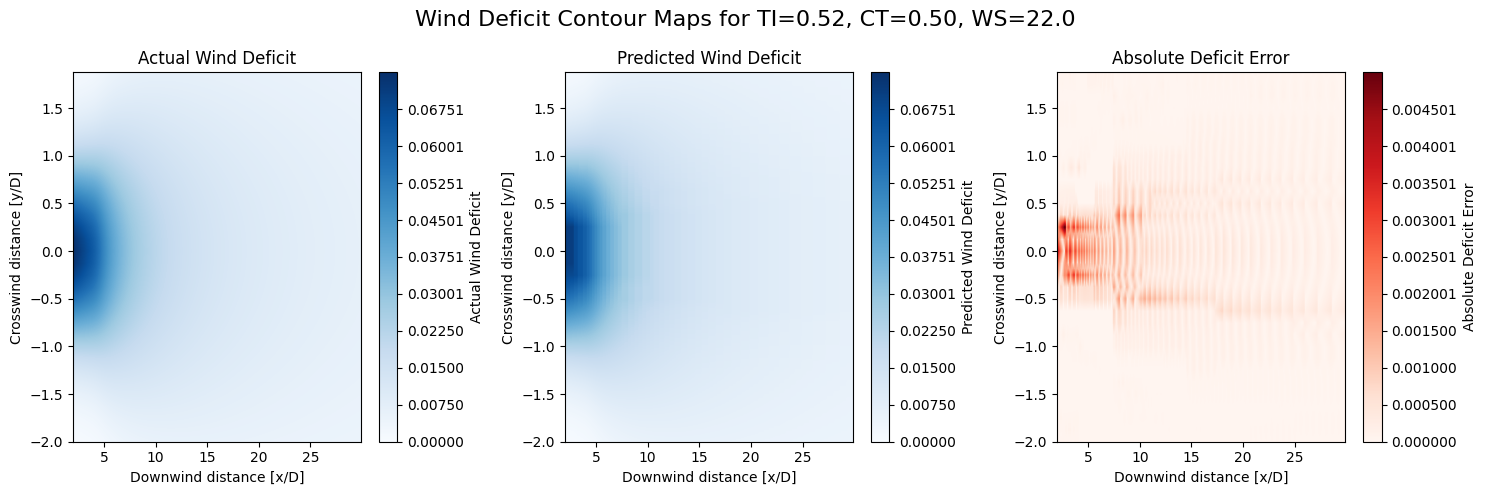

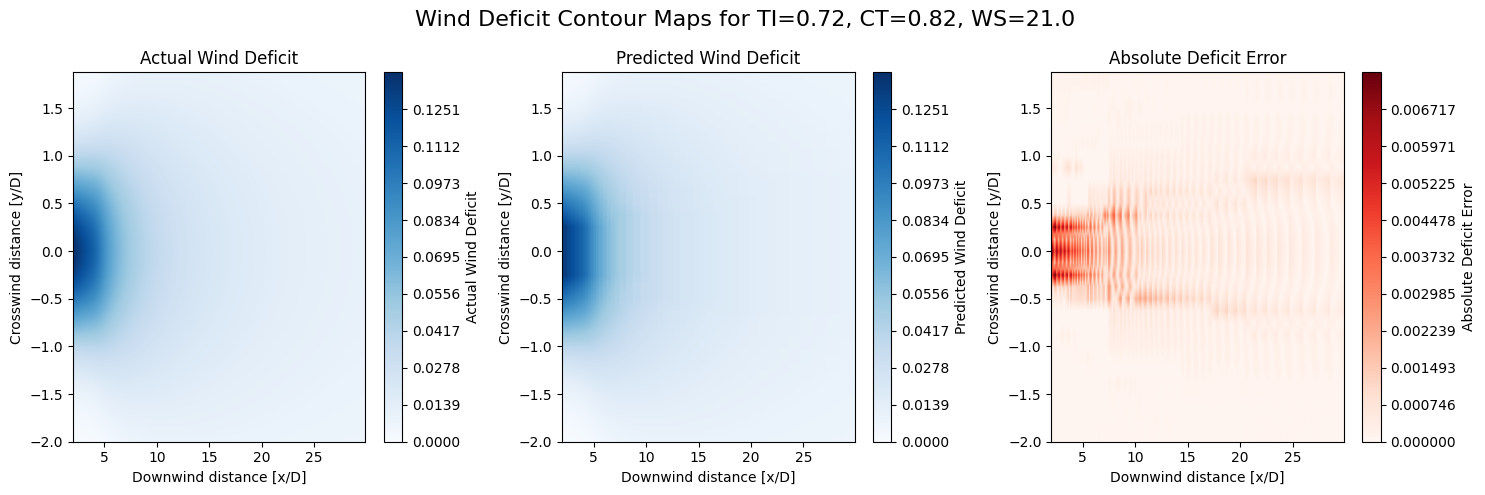

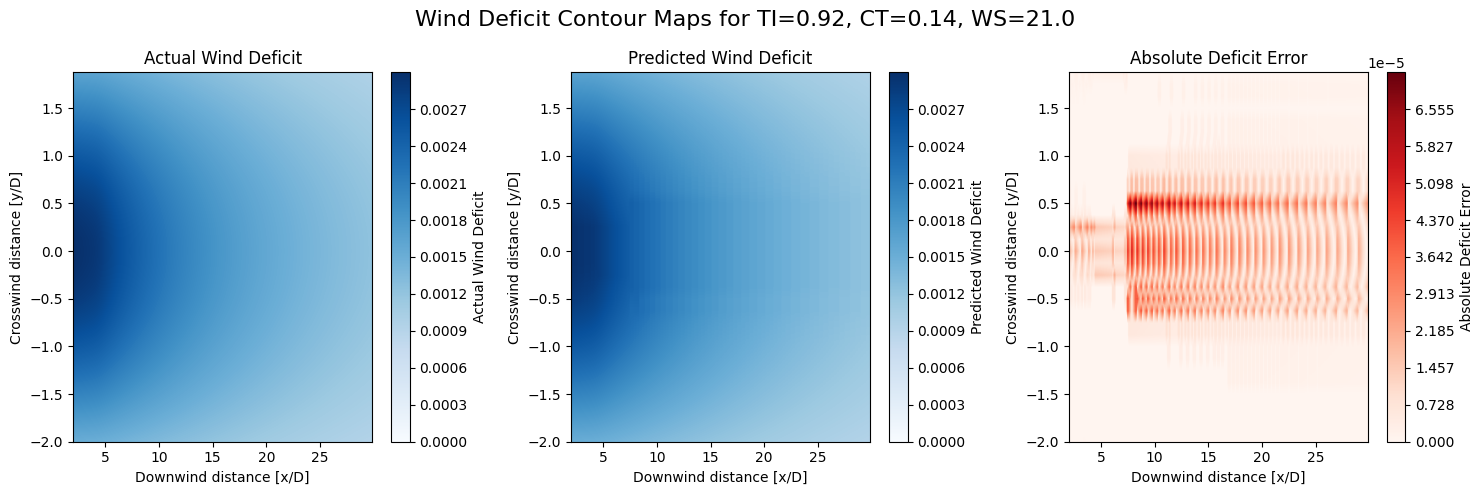

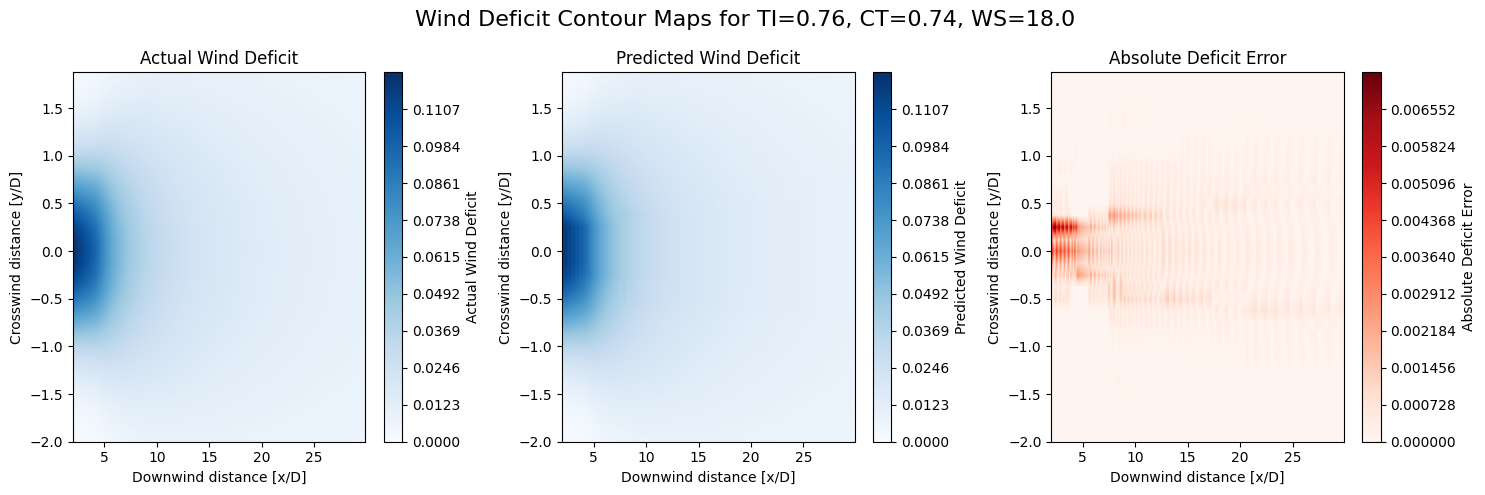

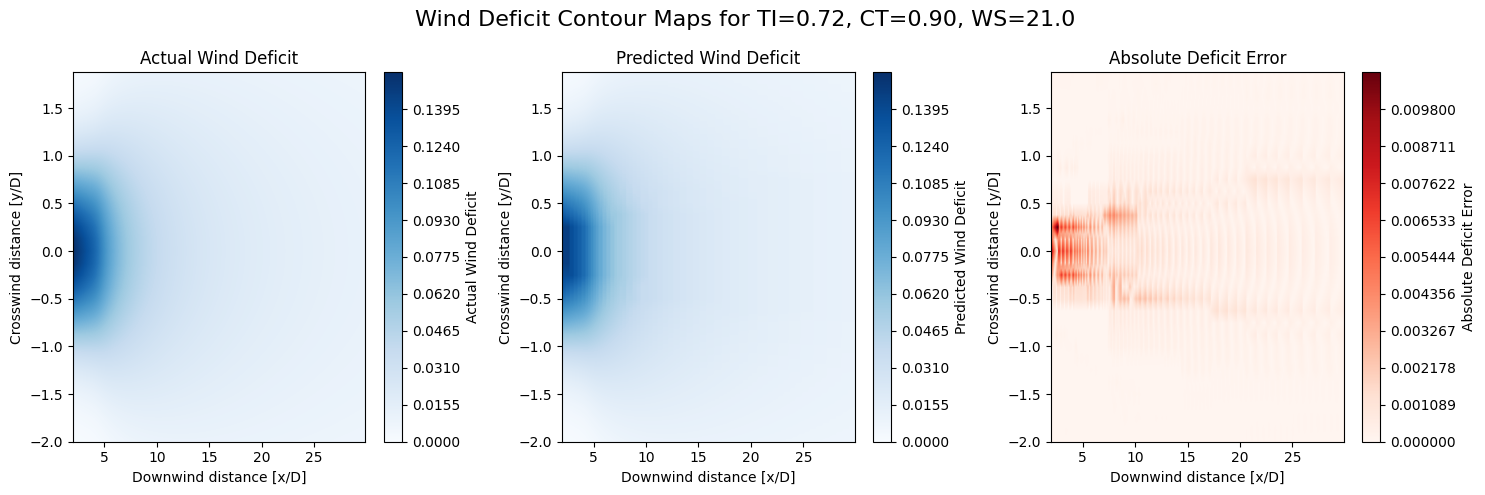

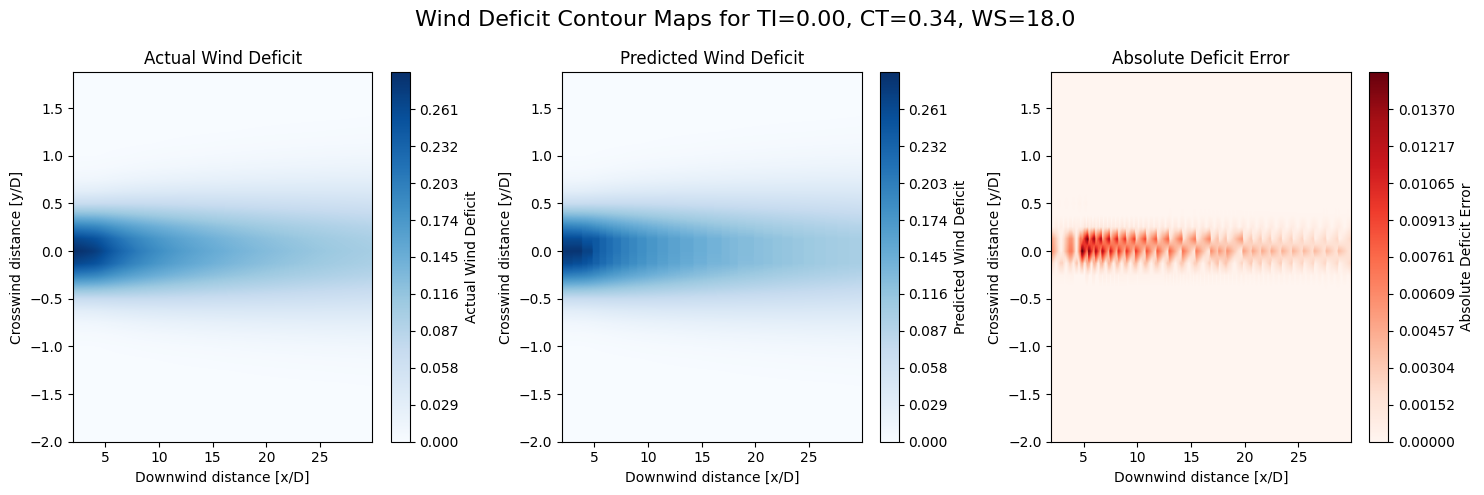

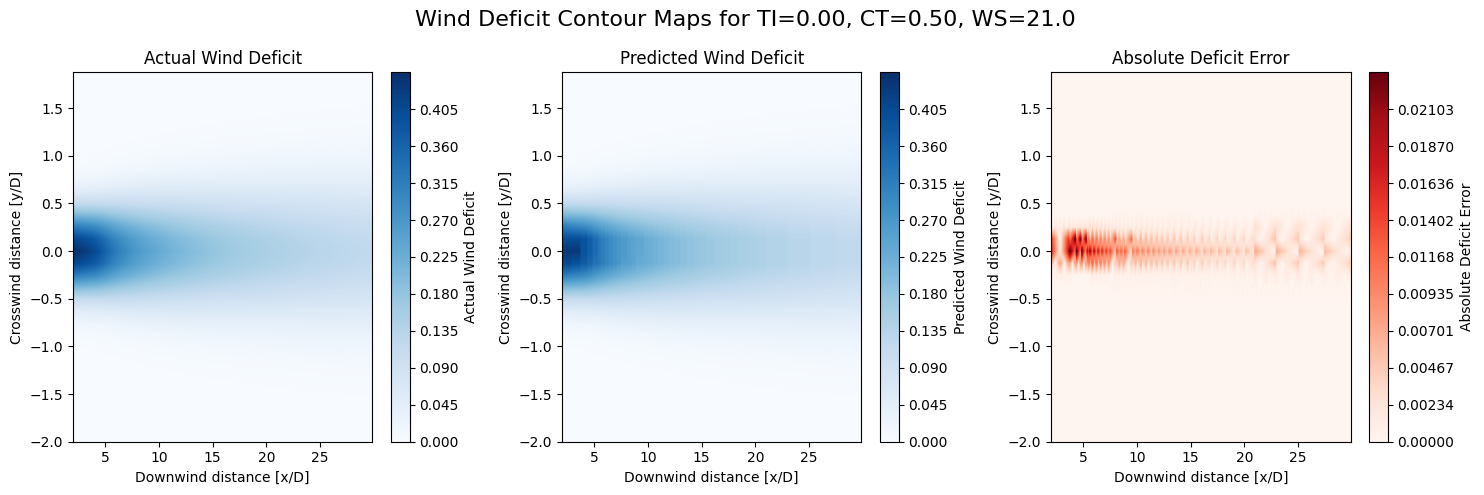

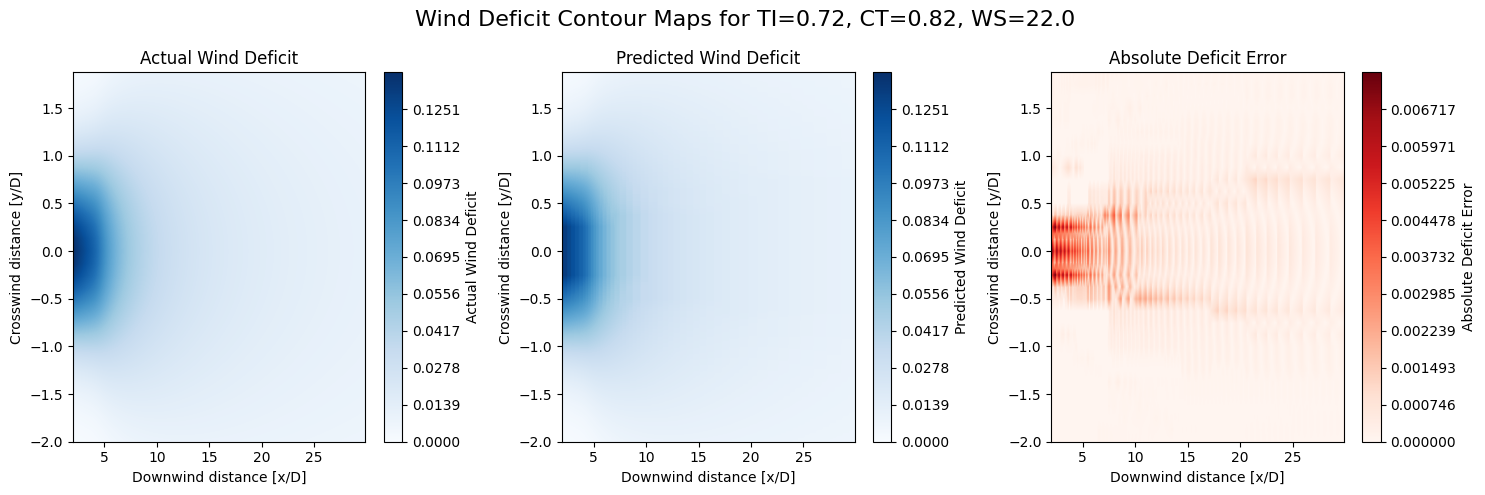

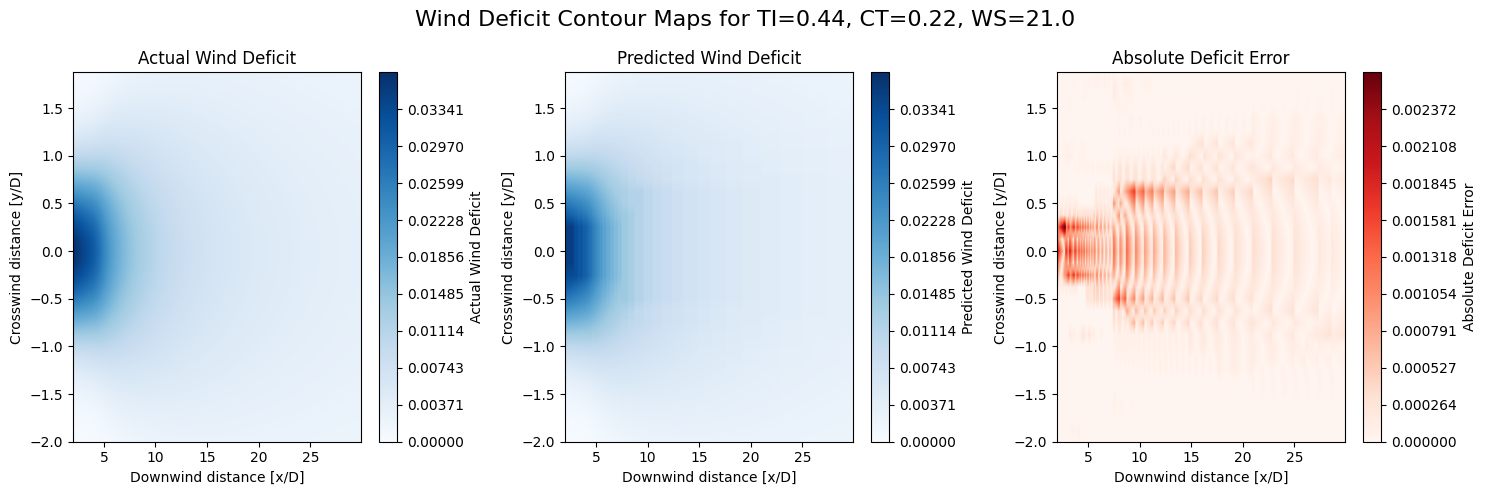

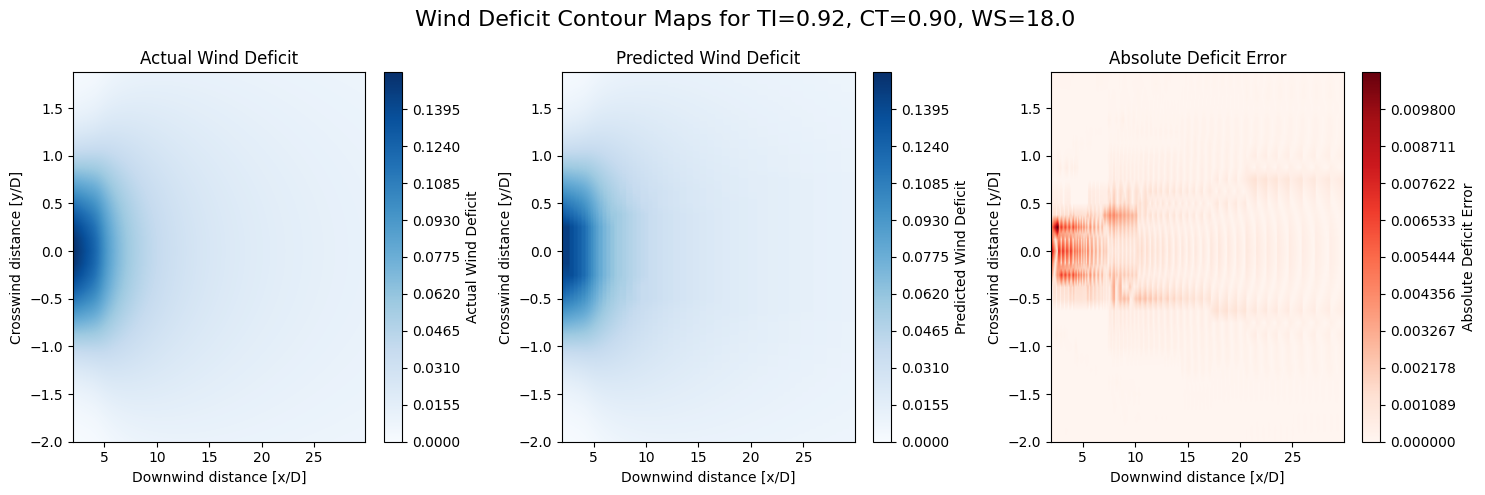

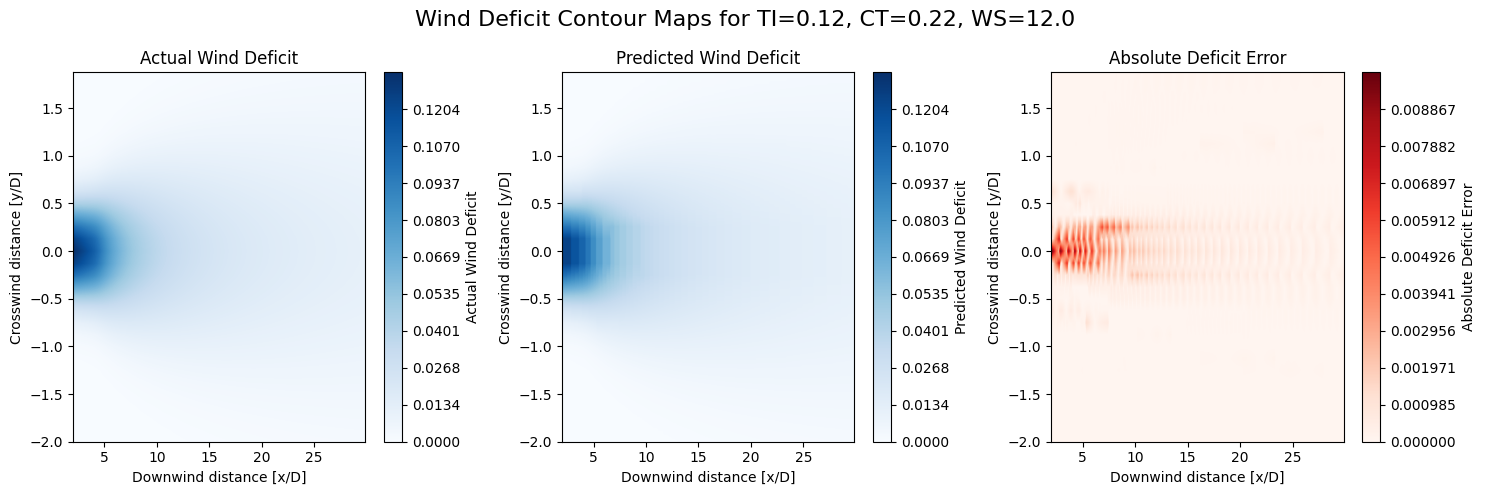

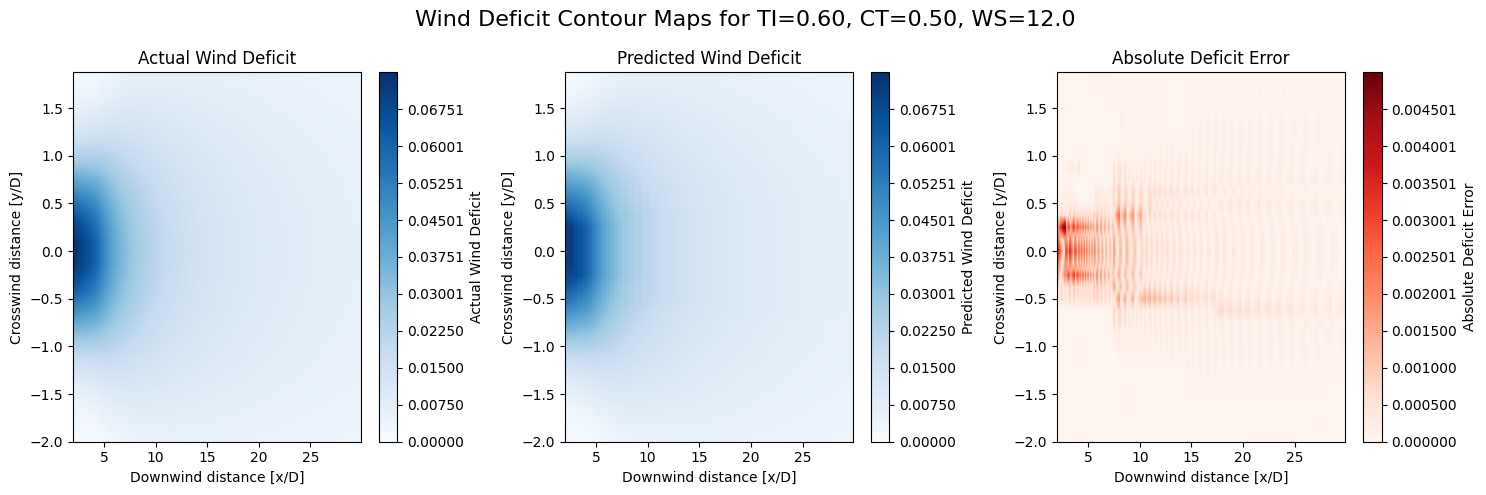

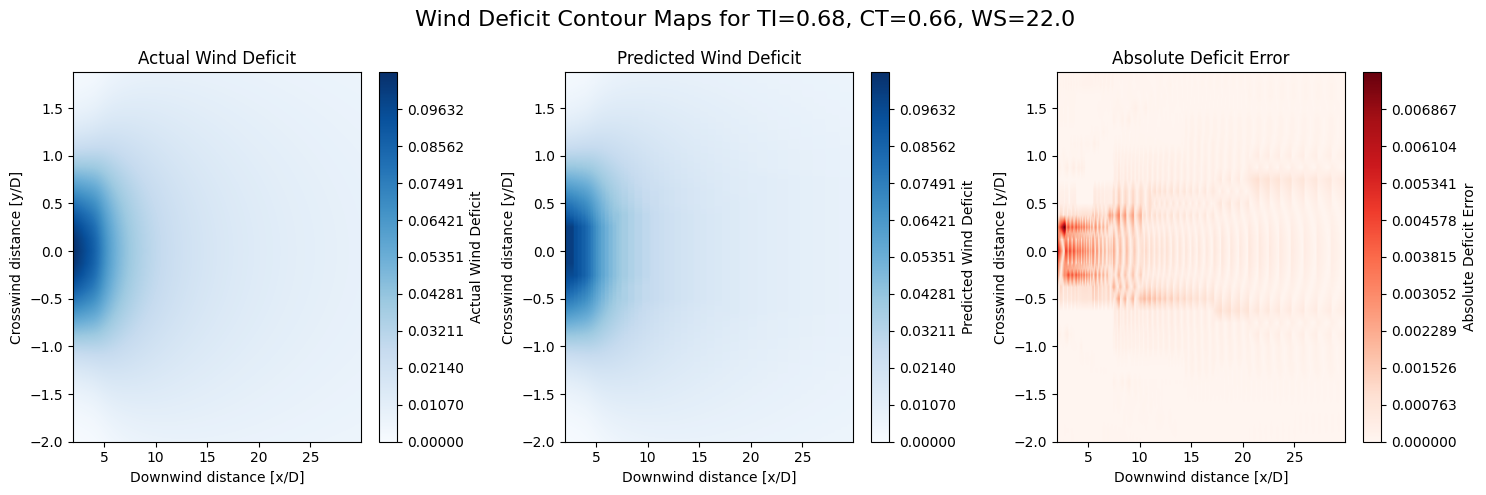

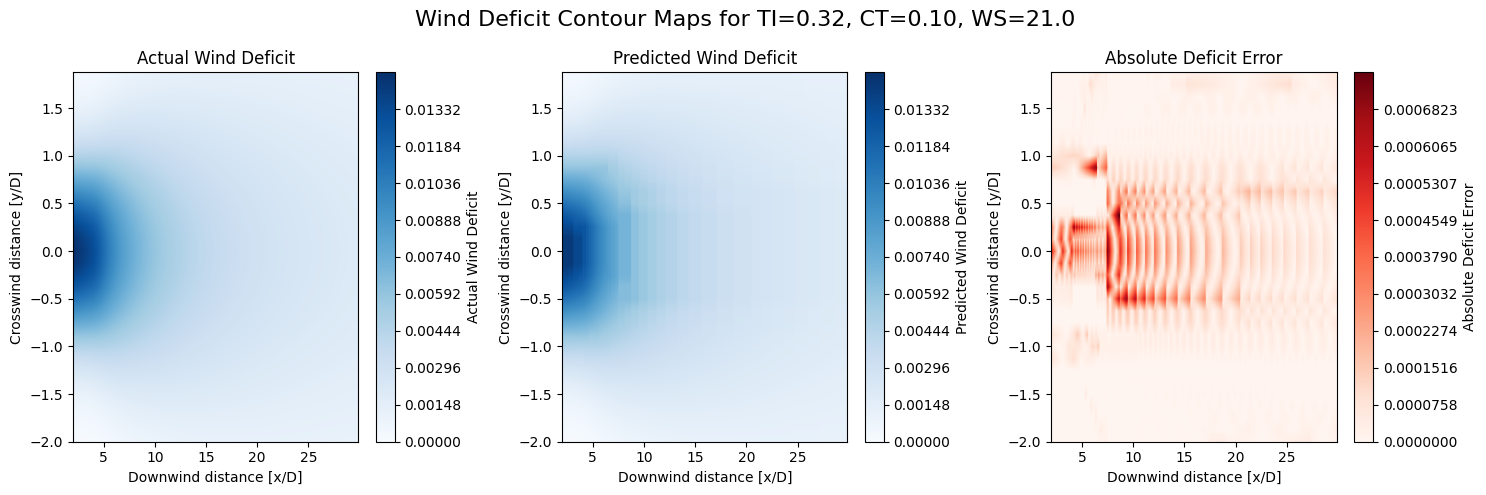

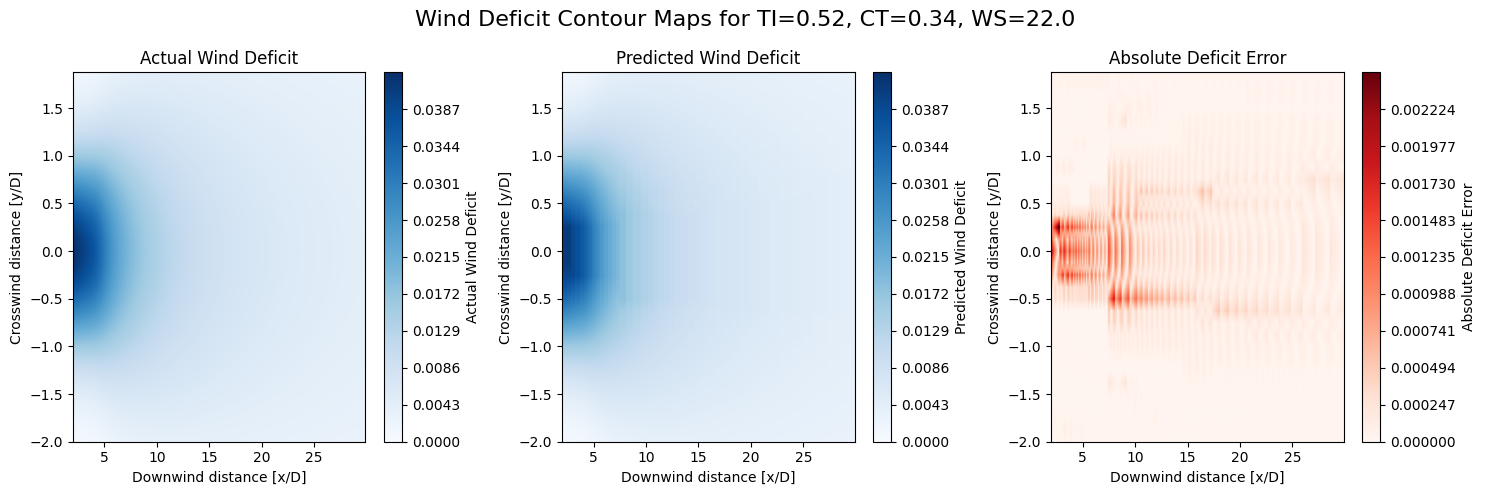

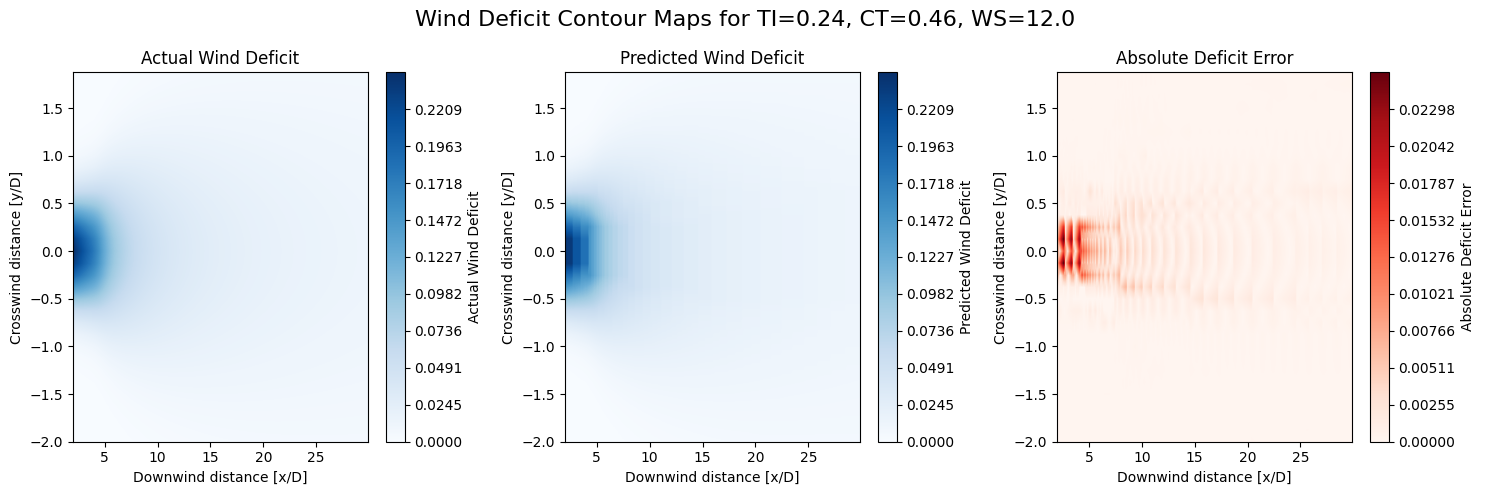

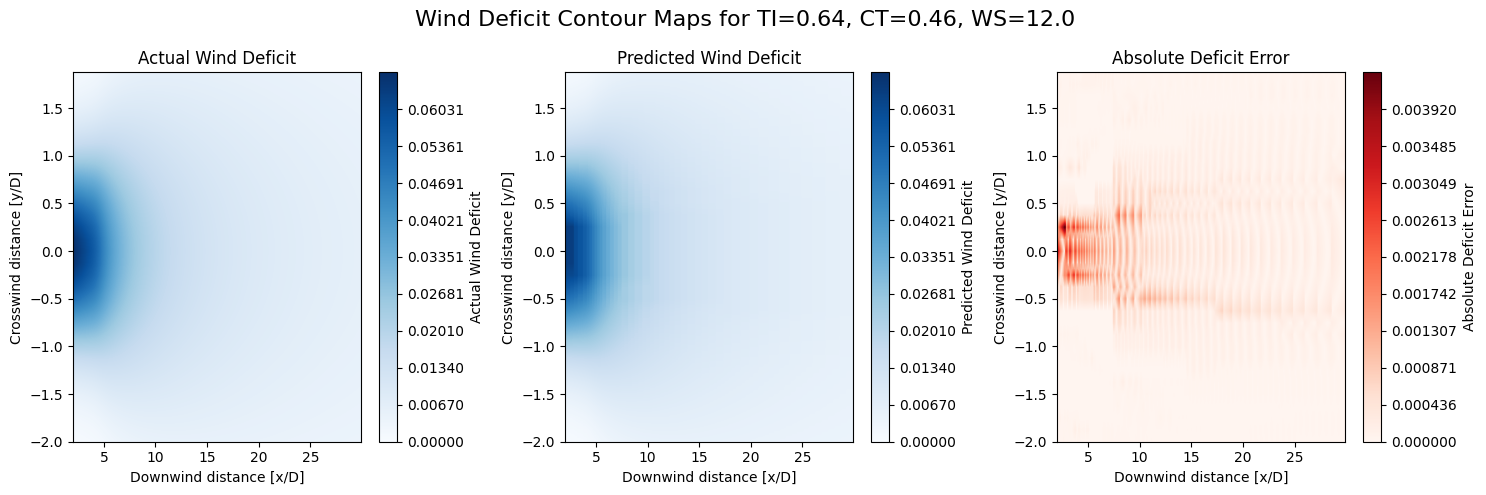

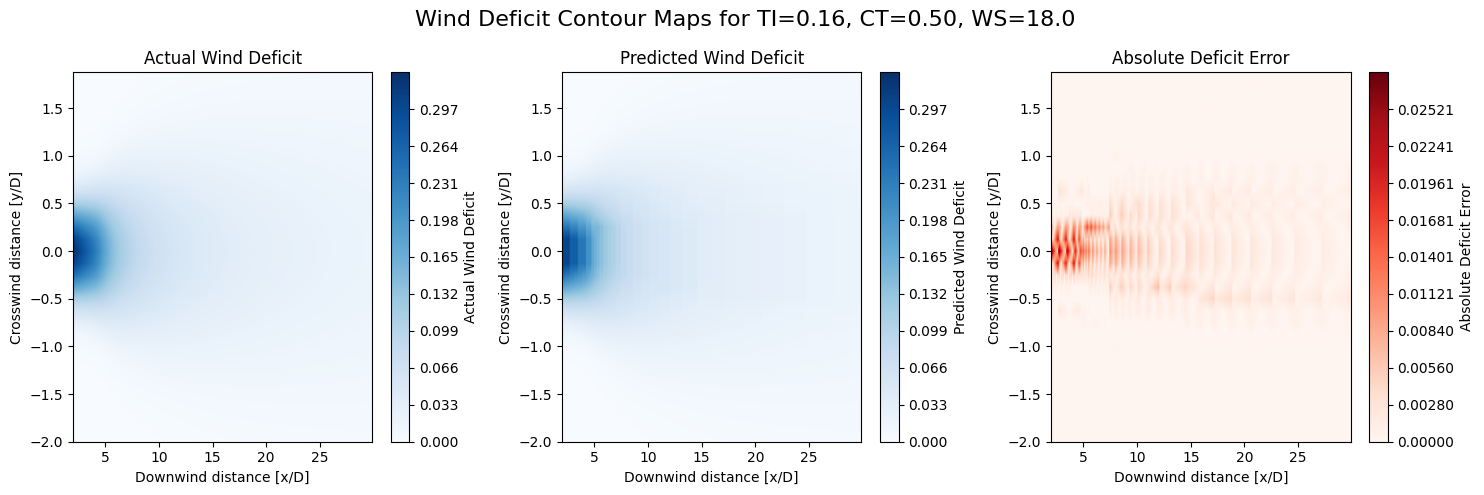

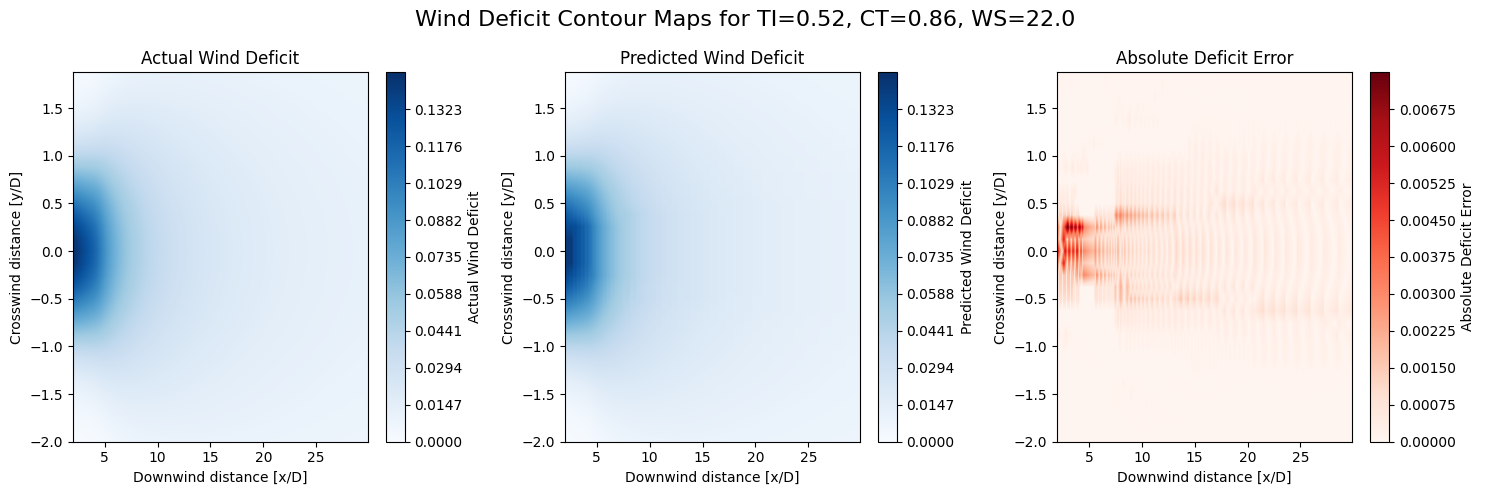

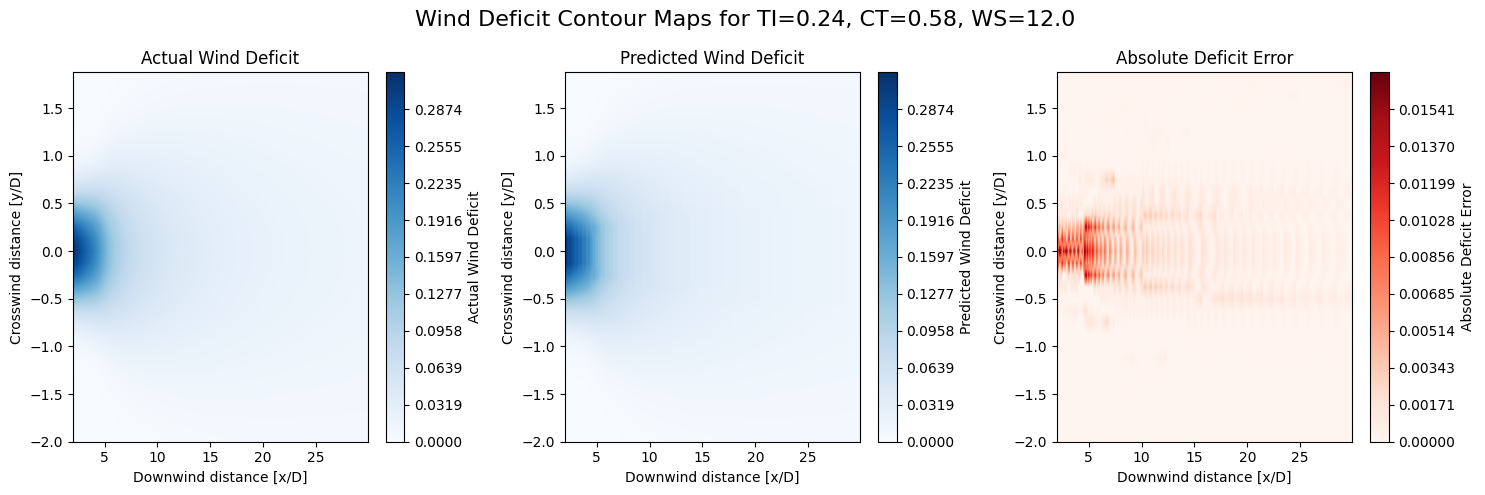

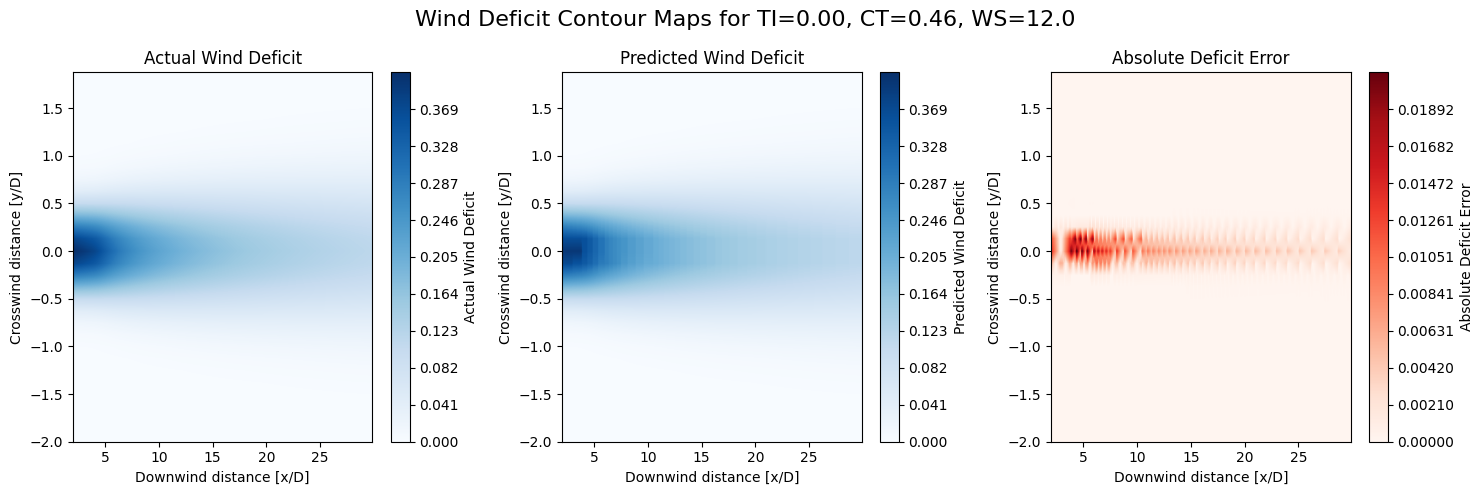

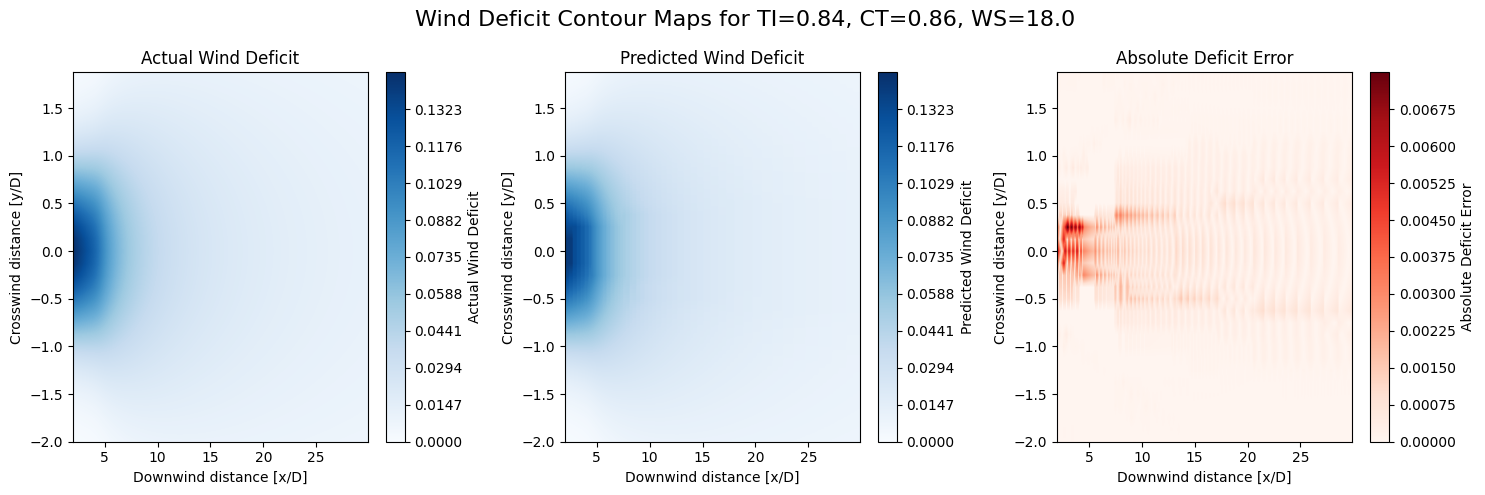

KeyboardInterrupt: 

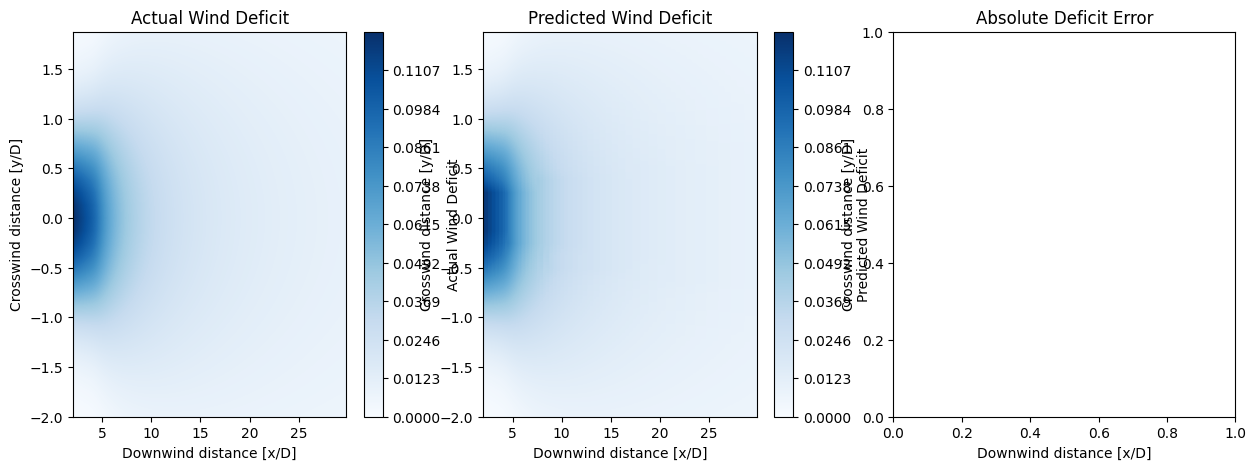

In [31]:
num_cells = test_dataset.num_cells
num_fields = len(test_dataset)//num_cells
field_indices = list(range(num_fields))
random.shuffle(field_indices)

for idx in field_indices:
    ti, ct, ws, wake_field, predicted_wake_field = test_dataset.get_parameters_for_plotting_univariate(model, idx)
    
    plotting.plot_maps(test_dataset.X_grid, test_dataset.Y_grid, wake_field, predicted_wake_field, ti, ct, ws, error_to_plot='absolute')